## I have downloaded three data sets, one for Data Scientist Job posts that have an indeed estimated salary of 65000 dollars plus, another for Data Scientist Job Posts that have an indeed estimated salary of 90000 dollars plus and a third data set for Data Scientist Job Posts that have an indeed estimated salary of 145000 dollars plus. 

In [42]:
import graphlab
from graphlab import SFrame
import pandas as pd
indeed145kds = pd.read_csv('sample_df_indeed145k_datascientist.csv')
indeed65kds = pd.read_csv('sample_df_indeed65k_datascientist.csv')
indeed90kds = pd.read_csv('sample_df_indeed90k_datascientist.csv')
indeed145kdssf = SFrame(data=indeed145kds)


indeed65kdssf = SFrame(data=indeed65kds)
indeed90kdssf = SFrame(data=indeed90kds)

In [43]:
indeed65kdssf ['originalestimate'] = '65k+'
indeed90kdssf ['originalestimate'] = '90k+'
indeed145kdssf ['originalestimate'] = '145k+'

In [44]:
import graphlab as gl
indeed90kdssf['word_count'] = graphlab.text_analytics.count_words(indeed90kdssf['summary'], delimiters=None) 
indeed90kdssf['job_word_count'] = graphlab.text_analytics.count_words(indeed90kdssf['job_title'], delimiters=None) 
indeed90kdssf['job_tfidf'] = graphlab.text_analytics.tf_idf(indeed90kdssf['job_word_count'])
indeed90kdssf['1gram features'] = gl.text_analytics.count_ngrams(indeed90kdssf['summary'], 1)
indeed90kdssf['2gram features'] = gl.text_analytics.count_ngrams(indeed90kdssf['summary'], 2)
indeed90kdssf['3gram features'] = gl.text_analytics.count_ngrams(indeed90kdssf['summary'], 3)
indeed90kdssf['tfidf'] =  graphlab.text_analytics.tf_idf(indeed90kdssf['word_count'])

indeed65kdssf['word_count'] = graphlab.text_analytics.count_words(indeed65kdssf['summary'], delimiters=None) 
indeed65kdssf['job_word_count'] = graphlab.text_analytics.count_words(indeed65kdssf['job_title'], delimiters=None) 
indeed65kdssf['job_tfidf'] = graphlab.text_analytics.tf_idf(indeed65kdssf['job_word_count'])
indeed65kdssf['1gram features'] = gl.text_analytics.count_ngrams(indeed65kdssf['summary'], 1)
indeed65kdssf['2gram features'] = gl.text_analytics.count_ngrams(indeed65kdssf['summary'], 2)
indeed65kdssf['3gram features'] = gl.text_analytics.count_ngrams(indeed65kdssf['summary'], 3)
indeed65kdssf['tfidf'] =  graphlab.text_analytics.tf_idf(indeed65kdssf['word_count'])

In [252]:
#After saving indeed65kdssf and indeed90kdssf sframes, I have sampled one percent of the combined 
#(indeed90kdssf and indeed65kdssf) to get a 1% test set with the same distribution as the remaining 99% training set.
#Then trained a Fast text model and a doc2vec model on the training set. The steps for training the Doc2vec
# and Fast text model then inferring the average fast text vector and the doc2vec vector for each sample in the training and
# test set are shown in the following IPYTHON NOTEBOOK that I have created.
# link: 
# here I am loading the training set after computing the average fast text and Doc2vec vectors


indeed65k_90k_dssf_train = pd.read_csv("indeed65k_90k_dssf_train.csv")
indeed65k_90k_dssf_test = pd.read_csv("indeed65k_90k_dssf_test.csv")

## We have experiemnted with L1 and L2 penalties throughout model training and grid search and we found that setting L2 penalties to 10 or 100 yeilds the best results on the training set as well as on the Validation set. Therefore we only varied the L2_Penalty between taking a value of 10 or 100.

In [91]:
#Training our classification Model and Fetaure Engineering
featureset1 = ['1gram features']
featureset2 = ['1gram features','2gram features']
featureset3 = ['1gram features','2gram features','3gram features']
featureset4 = ['1gram features','2gram features','3gram features','city']
featureset5 = ['1gram features','2gram features','3gram features','city','job_tfidf']
featureset6 = ['1gram features','2gram features','3gram features','city','job_tfidf','location']
featureset7 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name']
featureset8 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector']
featureset9 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title']
featureset10 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title','D2Vector']
model_65_90_FeatureSet1_l2_10 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset1,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=10)
model_65_90_FeatureSet1_l2_100 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset1,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 53960

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients    : 4826

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 4        | 0.000093  | 0.049035     | 0.904411          | 0.857342            |

| 2         | 6        | 1.000000  | 0.078556     | 0.931245          | 0.921172            |

| 3         | 7        | 1.000000  | 0.098070     | 0.931245          | 0.921172            |

| 4         | 8        | 1.000000  | 0.148105     | 0.903688          | 0.896756            |

| 5         | 9        | 1.000000  | 0.168620     | 0.922572          | 0.911754            |

| 6         | 10       | 1.000000  | 0.187132     | 0.922832          | 0.912103            |

| 11        | 16       | 1.000000  | 0.320727     | 0.922572          | 0.911754            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 53938

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

Number of coefficients    : 4824

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 4        | 0.000093  | 0.039528     | 0.905150          | 0.845967            |

| 2         | 6        | 1.000000  | 0.068048     | 0.931495          | 0.921772            |

| 3         | 7        | 1.000000  | 0.089564     | 0.931495          | 0.921772            |

| 4         | 8        | 1.000000  | 0.108076     | 0.904464          | 0.892696            |

| 5         | 9        | 1.000000  | 0.126590     | 0.922615          | 0.908619            |

| 6         | 10       | 1.000000  | 0.154610     | 0.931273          | 0.921772            |

| 11        | 18       | 1.000000  | 0.306717     | 0.931273          | 0.921772            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [92]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 10 and Featureset 1 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet1_l2_10.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.72
testacc
0.926829268293
precision
0.620689655172
recall
0.857142857143


In [93]:

#Fscore, Accuracy, Precision, Recall when L2_Penalty = 100 and Featureset 1 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet1_l2_100.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.739726027397
testacc
0.933797909408
precision
0.650602409639
recall
0.857142857143


In [94]:
#Training our classification Model and Fetaure Engineering
featureset1 = ['1gram features']
featureset2 = ['1gram features','2gram features']
featureset3 = ['1gram features','2gram features','3gram features']
featureset4 = ['1gram features','2gram features','3gram features','city']
featureset5 = ['1gram features','2gram features','3gram features','city','job_tfidf']
featureset6 = ['1gram features','2gram features','3gram features','city','job_tfidf','location']
featureset7 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name']
featureset8 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector']
featureset9 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title']
featureset10 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title','D2Vector']
model_65_90_FeatureSet2_l2_10 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset2,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=10)
model_65_90_FeatureSet2_l2_100 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset2,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 53980

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

Number of coefficients    : 9715

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000019  | 0.037527     | 0.904668          | 0.896382            |

| 2         | 5        | 1.000000  | 0.074053     | 0.931604          | 0.919916            |

| 3         | 6        | 1.000000  | 0.093566     | 0.931604          | 0.919916            |

| 4         | 7        | 1.000000  | 0.113581     | 0.904502          | 0.896031            |

| 5         | 8        | 1.000000  | 0.128092     | 0.931604          | 0.919916            |

| 6         | 9        | 1.000000  | 0.161114     | 0.923509          | 0.911837            |

| 11        | 14       | 1.000000  | 0.303715     | 0.904668          | 0.896382            |

| 50        | 66       | 1.000000  | 0.968686     | 0.905224          | 0.896382            |

| 51        | 67       | 1.000000  | 0.983196     | 0.905224          | 0.896382            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 54096

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

Number of coefficients    : 9655

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000018  | 0.035023     | 0.904392          | 0.852801            |

| 2         | 5        | 1.000000  | 0.058540     | 0.931012          | 0.922739            |

| 3         | 6        | 1.000000  | 0.074552     | 0.931233          | 0.922739            |

| 4         | 7        | 1.000000  | 0.093065     | 0.903708          | 0.903332            |

| 5         | 8        | 1.000000  | 0.116082     | 0.931012          | 0.922739            |

| 6         | 9        | 1.000000  | 0.137596     | 0.931012          | 0.922739            |

| 11        | 14       | 1.000000  | 0.256180     | 0.930531          | 0.921274            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [95]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 10 and Featureset 2 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet2_l2_10.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.682926829268
testacc
0.909407665505
precision
0.554455445545
recall
0.888888888889


In [96]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 100 and Featureset 2 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet2_l2_100.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.734693877551
testacc
0.932055749129
precision
0.642857142857
recall
0.857142857143


In [97]:
#Training our classification Model and Fetaure Engineering
featureset1 = ['1gram features']
featureset2 = ['1gram features','2gram features']
featureset3 = ['1gram features','2gram features','3gram features']
featureset4 = ['1gram features','2gram features','3gram features','city']
featureset5 = ['1gram features','2gram features','3gram features','city','job_tfidf']
featureset6 = ['1gram features','2gram features','3gram features','city','job_tfidf','location']
featureset7 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name']
featureset8 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector']
featureset9 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title']
featureset10 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title','D2Vector']
model_65_90_FeatureSet3_l2_10 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset3,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=10)
model_65_90_FeatureSet3_l2_100 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset3,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 54132

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

Number of coefficients    : 14539

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000018  | 0.035524     | 0.904326          | 0.848980            |

| 2         | 5        | 1.000000  | 0.067547     | 0.931205          | 0.917625            |

| 3         | 6        | 1.000000  | 0.101571     | 0.931205          | 0.917625            |

| 4         | 7        | 1.000000  | 0.125589     | 0.904345          | 0.889425            |

| 5         | 8        | 1.000000  | 0.149105     | 0.931205          | 0.917625            |

| 6         | 9        | 1.000000  | 0.170620     | 0.923095          | 0.909833            |

| 11        | 14       | 1.000000  | 0.320226     | 0.923095          | 0.909833            |

| 50        | 68       | 1.000000  | 1.259895     | 0.905453          | 0.889425            |

| 51        | 69       | 1.000000  | 1.279909     | 0.905453          | 0.889425            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 53891

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

Number of coefficients    : 14485

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000019  | 0.035012     | 0.905142          | 0.894074            |

| 2         | 5        | 1.000000  | 0.067037     | 0.931380          | 0.915531            |

| 3         | 6        | 1.000000  | 0.095055     | 0.931380          | 0.915531            |

| 4         | 7        | 1.000000  | 0.143088     | 0.903991          | 0.893733            |

| 5         | 8        | 1.000000  | 0.179113     | 0.931380          | 0.915531            |

| 6         | 9        | 1.000000  | 0.207134     | 0.931380          | 0.915531            |

| 11        | 14       | 1.000000  | 0.319713     | 0.904307          | 0.894074            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [98]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 10 and Featureset 3 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet3_l2_10.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.678787878788
testacc
0.907665505226
precision
0.549019607843
recall
0.888888888889


In [99]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 100 and Featureset 3 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet3_l2_100.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.731034482759
testacc
0.932055749129
precision
0.646341463415
recall
0.84126984127


In [100]:
#Training our classification Model and Fetaure Engineering
featureset1 = ['1gram features']
featureset2 = ['1gram features','2gram features']
featureset3 = ['1gram features','2gram features','3gram features']
featureset4 = ['1gram features','2gram features','3gram features','city']
featureset5 = ['1gram features','2gram features','3gram features','city','job_tfidf']
featureset6 = ['1gram features','2gram features','3gram features','city','job_tfidf','location']
featureset7 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name']
featureset8 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector']
featureset9 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title']
featureset10 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title','D2Vector']

featureset11 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title']
featureset12 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title','D2Vector']
model_65_90_FeatureSet4_l2_10 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset4,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=10)
model_65_90_FeatureSet4_l2_100 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset4,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 53917

Number of classes           : 2

Number of feature columns   : 4

Number of unpacked features : 4

Number of coefficients    : 14519

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000019  | 0.033525     | 0.891556          | 0.890722            |

| 2         | 5        | 1.000000  | 0.060043     | 0.929280          | 0.913746            |

| 3         | 6        | 1.000000  | 0.107076     | 0.932860          | 0.920962            |

| 4         | 7        | 1.000000  | 0.136597     | 0.931858          | 0.919931            |

| 5         | 8        | 1.000000  | 0.154110     | 0.933453          | 0.924055            |

| 6         | 9        | 1.000000  | 0.172623     | 0.934325          | 0.923024            |

| 11        | 14       | 1.000000  | 0.267690     | 0.934028          | 0.922337            |

| 50        | 61       | 1.000000  | 0.987198     | 0.934399          | 0.923024            |

| 51        | 62       | 1.000000  | 1.003210     | 0.934325          | 0.923024            |

| 100       | 141      | 1.000000  | 2.156025     | 0.934344          | 0.923024            |

| 101       | 143      | 1.000000  | 2.181544     | 0.934344          | 0.923024            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 54052

Number of classes           : 2

Number of feature columns   : 4

Number of unpacked features : 4

Number of coefficients    : 14588

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000019  | 0.029019     | 0.891641          | 0.888288            |

| 2         | 5        | 1.000000  | 0.060542     | 0.930382          | 0.905586            |

| 3         | 6        | 1.000000  | 0.078055     | 0.933342          | 0.909910            |

| 4         | 7        | 1.000000  | 0.105073     | 0.932879          | 0.909189            |

| 5         | 8        | 1.000000  | 0.123586     | 0.933989          | 0.911351            |

| 6         | 9        | 1.000000  | 0.139097     | 0.933971          | 0.909910            |

| 11        | 14       | 1.000000  | 0.245173     | 0.934711          | 0.910631            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [101]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 10 and Featureset 4 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet4_l2_10.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.743243243243
testacc
0.933797909408
precision
0.647058823529
recall
0.873015873016


In [102]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 100 and Featureset 4 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet4_l2_100.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.751677852349
testacc
0.935540069686
precision
0.651162790698
recall
0.888888888889


In [103]:
#Training our classification Model and Fetaure Engineering
featureset1 = ['1gram features']
featureset2 = ['1gram features','2gram features']
featureset3 = ['1gram features','2gram features','3gram features']
featureset4 = ['1gram features','2gram features','3gram features','city']
featureset5 = ['1gram features','2gram features','3gram features','city','job_tfidf']
featureset6 = ['1gram features','2gram features','3gram features','city','job_tfidf','location']
featureset7 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name']
featureset8 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector']
featureset9 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title']
featureset10 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title','D2Vector']
model_65_90_FeatureSet5_l2_10 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset5,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=10)
model_65_90_FeatureSet5_l2_100 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset5,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 54055

Number of classes           : 2

Number of feature columns   : 5

Number of unpacked features : 5

Number of coefficients    : 19318

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000018  | 0.040028     | 0.918379          | 0.911255            |

| 2         | 5        | 1.000000  | 0.073051     | 0.934696          | 0.917749            |

| 3         | 6        | 1.000000  | 0.110077     | 0.950717          | 0.932900            |

| 4         | 7        | 1.000000  | 0.147104     | 0.986680          | 0.968975            |

| 5         | 8        | 1.000000  | 0.169119     | 0.999963          | 0.980519            |

| 6         | 9        | 1.000000  | 0.205145     | 0.999963          | 0.981241            |

| 11        | 15       | 1.000000  | 0.366258     | 1.000000          | 0.981602            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 54046

Number of classes           : 2

Number of feature columns   : 5

Number of unpacked features : 5

Number of coefficients    : 19242

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000019  | 0.037035     | 0.917885          | 0.914060            |

| 2         | 5        | 1.000000  | 0.065046     | 0.934241          | 0.926645            |

| 3         | 6        | 1.000000  | 0.104073     | 0.950561          | 0.935275            |

| 4         | 7        | 1.000000  | 0.153108     | 0.986141          | 0.973031            |

| 5         | 8        | 1.000000  | 0.185131     | 0.999963          | 0.985617            |

| 6         | 9        | 1.000000  | 0.236168     | 0.999963          | 0.985976            |

| 11        | 18       | 1.000000  | 0.413292     | 0.999944          | 0.986695            |

| 25        | 36       | 1.000000  | 0.686486     | 1.000000          | 0.986695            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [104]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 10 and Featureset 5 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet5_l2_10.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.942148760331
testacc
0.987804878049
precision
0.98275862069
recall
0.904761904762


In [105]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 100 and Featureset 5 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet5_l2_100.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.933333333333
testacc
0.98606271777
precision
0.982456140351
recall
0.888888888889


In [106]:
#Training our classification Model and Fetaure Engineering
featureset1 = ['1gram features']
featureset2 = ['1gram features','2gram features']
featureset3 = ['1gram features','2gram features','3gram features']
featureset4 = ['1gram features','2gram features','3gram features','city']
featureset5 = ['1gram features','2gram features','3gram features','city','job_tfidf']
featureset6 = ['1gram features','2gram features','3gram features','city','job_tfidf','location']
featureset7 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name']
featureset8 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector']
featureset9 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title']
featureset10 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title','D2Vector']
model_65_90_FeatureSet6_l2_10 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset6,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=10)
model_65_90_FeatureSet6_l2_100 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset6,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 54034

Number of classes           : 2

Number of feature columns   : 6

Number of unpacked features : 6

Number of coefficients    : 20113

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000019  | 0.035043     | 0.895510          | 0.900107            |

| 2         | 5        | 1.000000  | 0.073052     | 0.932820          | 0.934479            |

| 3         | 6        | 1.000000  | 0.096068     | 0.954566          | 0.948443            |

| 4         | 7        | 1.000000  | 0.137098     | 0.981438          | 0.968493            |

| 5         | 8        | 1.000000  | 0.174123     | 0.999907          | 0.986753            |

| 6         | 9        | 1.000000  | 0.204144     | 0.999963          | 0.986395            |

| 11        | 15       | 1.000000  | 0.338239     | 0.999963          | 0.987111            |

| 50        | 69       | 1.000000  | 1.158820     | 1.000000          | 0.988901            |

| 51        | 71       | 1.000000  | 1.188840     | 1.000000          | 0.988901            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 53907

Number of classes           : 2

Number of feature columns   : 6

Number of unpacked features : 6

Number of coefficients    : 20013

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000019  | 0.033020     | 0.896136          | 0.887671            |

| 2         | 5        | 1.000000  | 0.066044     | 0.933589          | 0.914726            |

| 3         | 6        | 1.000000  | 0.109075     | 0.955368          | 0.933904            |

| 4         | 7        | 1.000000  | 0.131090     | 0.958632          | 0.939384            |

| 5         | 8        | 1.000000  | 0.153105     | 0.999648          | 0.981507            |

| 6         | 9        | 1.000000  | 0.177123     | 0.999889          | 0.983562            |

| 11        | 14       | 1.000000  | 0.294205     | 1.000000          | 0.984247            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [107]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 10 and Featureset 6 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet6_l2_10.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.933333333333
testacc
0.98606271777
precision
0.982456140351
recall
0.888888888889


In [108]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 100 and Featureset 6 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet6_l2_100.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.942148760331
testacc
0.987804878049
precision
0.98275862069
recall
0.904761904762


In [109]:
#Training our classification Model and Fetaure Engineering
featureset1 = ['1gram features']
featureset2 = ['1gram features','2gram features']
featureset3 = ['1gram features','2gram features','3gram features']
featureset4 = ['1gram features','2gram features','3gram features','city']
featureset5 = ['1gram features','2gram features','3gram features','city','job_tfidf']
featureset6 = ['1gram features','2gram features','3gram features','city','job_tfidf','location']
featureset7 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name']
featureset8 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector']
featureset9 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title']
featureset10 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title','D2Vector']
model_65_90_FeatureSet7_l2_10 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset7,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=10)
model_65_90_FeatureSet7_l2_100 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset7,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 54063

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

Number of coefficients    : 22332

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000018  | 0.042012     | 0.892292          | 0.889291            |

| 2         | 5        | 1.000000  | 0.097050     | 0.930507          | 0.922214            |

| 3         | 6        | 1.000000  | 0.148086     | 0.963376          | 0.945007            |

| 4         | 7        | 1.000000  | 0.181110     | 0.949966          | 0.935601            |

| 5         | 8        | 1.000000  | 0.214133     | 0.995246          | 0.975760            |

| 6         | 9        | 1.000000  | 0.263168     | 0.999945          | 0.980463            |

| 11        | 14       | 1.000000  | 0.397262     | 1.000000          | 0.981187            |

| 25        | 29       | 1.000000  | 0.718489     | 0.999926          | 0.982272            |

| 50        | 66       | 1.000000  | 1.411980     | 1.000000          | 0.982996            |

| 51        | 67       | 1.000000  | 1.434996     | 1.000000          | 0.982996            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 53968

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

Number of coefficients    : 22239

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000019  | 0.044032     | 0.895308          | 0.892970            |

| 2         | 5        | 1.000000  | 0.082058     | 0.929792          | 0.920602            |

| 3         | 6        | 1.000000  | 0.104074     | 0.962867          | 0.947184            |

| 4         | 7        | 1.000000  | 0.129091     | 0.949489          | 0.935642            |

| 5         | 8        | 1.000000  | 0.153108     | 0.991143          | 0.973068            |

| 6         | 9        | 1.000000  | 0.182129     | 0.999833          | 0.981812            |

| 11        | 14       | 1.000000  | 0.354250     | 0.999926          | 0.984260            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [110]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 10 and Featureset 7 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet7_l2_10.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.942148760331
testacc
0.987804878049
precision
0.98275862069
recall
0.904761904762


In [111]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 100 and Featureset 7 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet7_l2_100.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.942148760331
testacc
0.987804878049
precision
0.98275862069
recall
0.904761904762


In [112]:
#Training our classification Model and Fetaure Engineering
featureset1 = ['1gram features']
featureset2 = ['1gram features','2gram features']
featureset3 = ['1gram features','2gram features','3gram features']
featureset4 = ['1gram features','2gram features','3gram features','city']
featureset5 = ['1gram features','2gram features','3gram features','city','job_tfidf']
featureset6 = ['1gram features','2gram features','3gram features','city','job_tfidf','location']
featureset7 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name']
featureset8 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector']
featureset9 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title']
featureset10 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title','D2Vector']
model_65_90_FeatureSet8_l2_10 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset8,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=10)
model_65_90_FeatureSet8_l2_100 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset8,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 53939

Number of classes           : 2

Number of feature columns   : 8

Number of unpacked features : 8

Number of coefficients    : 27040

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000019  | 0.037034     | 0.897532          | 0.888504            |

| 2         | 5        | 1.000000  | 0.073039     | 0.933128          | 0.921399            |

| 3         | 6        | 1.000000  | 0.109067     | 0.977252          | 0.963296            |

| 4         | 7        | 1.000000  | 0.133082     | 0.948442          | 0.934211            |

| 5         | 8        | 1.000000  | 0.156098     | 0.987412          | 0.968837            |

| 6         | 9        | 1.000000  | 0.177114     | 0.999926          | 0.981302            |

| 11        | 14       | 1.000000  | 0.302201     | 0.999981          | 0.983033            |

| 50        | 69       | 1.000000  | 1.118779     | 1.000000          | 0.985111            |

| 51        | 71       | 1.000000  | 1.147800     | 1.000000          | 0.985111            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 53981

Number of classes           : 2

Number of feature columns   : 8

Number of unpacked features : 8

Number of coefficients    : 27168

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000019  | 0.037032     | 0.897890          | 0.886507            |

| 2         | 5        | 1.000000  | 0.073040     | 0.932828          | 0.916725            |

| 3         | 6        | 1.000000  | 0.098058     | 0.968878          | 0.949403            |

| 4         | 7        | 1.000000  | 0.129080     | 0.944499          | 0.923401            |

| 5         | 8        | 1.000000  | 0.183122     | 0.986662          | 0.963106            |

| 6         | 9        | 1.000000  | 0.209136     | 0.999704          | 0.976458            |

| 11        | 14       | 1.000000  | 0.339228     | 0.999981          | 0.981377            |

| 50        | 72       | 1.000000  | 1.155806     | 1.000000          | 0.981026            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [113]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 10 and Featureset 8 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet8_l2_10.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.934426229508
testacc
0.98606271777
precision
0.966101694915
recall
0.904761904762


In [114]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 100 and Featureset 8 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet8_l2_100.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.942148760331
testacc
0.987804878049
precision
0.98275862069
recall
0.904761904762


In [115]:
#Training our classification Model and Fetaure Engineering
featureset1 = ['1gram features']
featureset2 = ['1gram features','2gram features']
featureset3 = ['1gram features','2gram features','3gram features']
featureset4 = ['1gram features','2gram features','3gram features','city']
featureset5 = ['1gram features','2gram features','3gram features','city','job_tfidf']
featureset6 = ['1gram features','2gram features','3gram features','city','job_tfidf','location']
featureset7 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name']
featureset8 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector']
featureset9 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title']
featureset10 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title','D2Vector']
model_65_90_FeatureSet9_l2_10 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset9,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=10)
model_65_90_FeatureSet9_l2_100 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset9,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 53997

Number of classes           : 2

Number of feature columns   : 9

Number of unpacked features : 9

Number of coefficients    : 31387

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000019  | 0.044026     | 0.900106          | 0.891519            |

| 2         | 5        | 1.000000  | 0.085048     | 0.932885          | 0.915548            |

| 3         | 6        | 1.000000  | 0.111067     | 0.973962          | 0.949470            |

| 4         | 7        | 1.000000  | 0.143089     | 0.949386          | 0.926148            |

| 5         | 8        | 1.000000  | 0.171109     | 0.987962          | 0.964311            |

| 6         | 9        | 1.000000  | 0.194125     | 0.999944          | 0.980212            |

| 11        | 14       | 1.000000  | 0.339229     | 0.999944          | 0.981979            |

| 50        | 66       | 1.000000  | 1.157807     | 1.000000          | 0.984806            |

| 51        | 67       | 1.000000  | 1.178822     | 1.000000          | 0.984806            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 53949

Number of classes           : 2

Number of feature columns   : 9

Number of unpacked features : 9

Number of coefficients    : 31374

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000019  | 0.043033     | 0.900017          | 0.884642            |

| 2         | 5        | 1.000000  | 0.080040     | 0.932844          | 0.915566            |

| 3         | 6        | 1.000000  | 0.121069     | 0.969805          | 0.949270            |

| 4         | 7        | 1.000000  | 0.145085     | 0.947024          | 0.925295            |

| 5         | 8        | 1.000000  | 0.172105     | 0.986005          | 0.964559            |

| 6         | 9        | 1.000000  | 0.201125     | 0.999722          | 0.978457            |

| 11        | 15       | 1.000000  | 0.366242     | 1.000000          | 0.980542            |

| 50        | 74       | 1.000000  | 1.328922     | 1.000000          | 0.981237            |

| 51        | 75       | 1.000000  | 1.348936     | 1.000000          | 0.981237            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [116]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 10 and Featureset 9 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet9_l2_10.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.934426229508
testacc
0.98606271777
precision
0.966101694915
recall
0.904761904762


In [117]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 100 and Featureset 9 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet9_l2_100.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.934426229508
testacc
0.98606271777
precision
0.966101694915
recall
0.904761904762


In [118]:
#Training our classification Model and Fetaure Engineering
featureset1 = ['1gram features']
featureset2 = ['1gram features','2gram features']
featureset3 = ['1gram features','2gram features','3gram features']
featureset4 = ['1gram features','2gram features','3gram features','city']
featureset5 = ['1gram features','2gram features','3gram features','city','job_tfidf']
featureset6 = ['1gram features','2gram features','3gram features','city','job_tfidf','location']
featureset7 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name']
featureset8 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector']
featureset9 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title']
featureset10 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title','D2Vector']
model_65_90_FeatureSet10_l2_10 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset10,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=10)
model_65_90_FeatureSet10_l2_100 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset10,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

Logistic regression:

--------------------------------------------------------

Number of examples          : 54021

Number of classes           : 2

Number of feature columns   : 10

Number of unpacked features : 10

Number of coefficients    : 85466

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000019  | 0.059044     | 0.907980          | 0.890592            |

| 2         | 5        | 1.000000  | 0.102074     | 0.935655          | 0.915182            |

| 3         | 6        | 1.000000  | 0.130093     | 0.994502          | 0.961867            |

| 4         | 7        | 1.000000  | 0.161115     | 0.999889          | 0.940485            |

| 5         | 8        | 1.000000  | 0.190136     | 1.000000          | 0.974697            |

| 6         | 9        | 1.000000  | 0.222158     | 1.000000          | 0.973984            |

| 11        | 14       | 1.000000  | 0.380270     | 1.000000          | 0.976123            |

| 50        | 74       | 1.000000  | 1.693198     | 1.000000          | 0.978261            |

| 51        | 78       | 0.250000  | 1.770254     | 1.000000          | 0.978261            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

Logistic regression:

--------------------------------------------------------

Number of examples          : 53942

Number of classes           : 2

Number of feature columns   : 10

Number of unpacked features : 10

Number of coefficients    : 85348

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000019  | 0.061044     | 0.907642          | 0.897054            |

| 2         | 5        | 1.000000  | 0.105074     | 0.935579          | 0.918544            |

| 3         | 6        | 1.000000  | 0.138098     | 0.994624          | 0.955979            |

| 4         | 7        | 1.000000  | 0.169119     | 0.999889          | 0.939341            |

| 5         | 8        | 1.000000  | 0.199140     | 1.000000          | 0.971924            |

| 6         | 9        | 1.000000  | 0.233166     | 1.000000          | 0.971924            |

| 11        | 14       | 1.000000  | 0.384272     | 1.000000          | 0.974003            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [119]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 10 and Featureset 10 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet10_l2_10.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.90756302521
testacc
0.980836236934
precision
0.964285714286
recall
0.857142857143


In [120]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 100 and Featureset 10 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet10_l2_100.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.871794871795
testacc
0.973867595819
precision
0.944444444444
recall
0.809523809524


## I have noticed that when adding the "job_tfidf" fetaure, the fscore, precision and recall jumped up by double digits starting from feature set 5. Lets check the perfomance when eliminating the "job_tfidf" which is the tfidf of the job title column while keeping all other features (Feature set 11). Feature Sets 12 and 13 were for testing the use of Avg fast text vector vs using the doc2vec vector instead.

In [226]:
#Training our classification Model and Fetaure Engineering
featureset1 = ['1gram features']
featureset2 = ['1gram features','2gram features']
featureset3 = ['1gram features','2gram features','3gram features']
featureset4 = ['1gram features','2gram features','3gram features','city']
featureset5 = ['1gram features','2gram features','3gram features','city','job_tfidf']
featureset6 = ['1gram features','2gram features','3gram features','city','job_tfidf','location']
featureset7 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name']
featureset8 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector']
featureset9 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title']
featureset10 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title','D2Vector']
featureset11 = ['1gram features','2gram features','3gram features','city','location','company_name','AvgFTVector','job_title','D2Vector']

featureset12 = ['1gram features','2gram features','3gram features','city','location','company_name','job_tfidf','AvgFTVector','job_title']
featureset13 = ['1gram features','2gram features','3gram features','city','location','company_name','job_tfidf','D2Vector','job_title']

model_65_90_FeatureSet11_l2_10 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset11,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=10)
model_65_90_FeatureSet11_l2_100 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset11,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

Logistic regression:

--------------------------------------------------------

Number of examples          : 53909

Number of classes           : 2

Number of feature columns   : 9

Number of unpacked features : 9

Number of coefficients    : 80594

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000019  | 0.069049     | 0.921052          | 0.906100            |

| 2         | 5        | 1.000000  | 0.114082     | 0.934427          | 0.913639            |

| 3         | 6        | 1.000000  | 0.145103     | 0.970524          | 0.921179            |

| 4         | 7        | 1.000000  | 0.175625     | 0.953162          | 0.918095            |

| 5         | 8        | 1.000000  | 0.205646     | 0.999889          | 0.918780            |

| 6         | 9        | 1.000000  | 0.237668     | 0.999981          | 0.922550            |

| 11        | 14       | 1.000000  | 0.399283     | 1.000000          | 0.924606            |

| 50        | 70       | 1.000000  | 1.632654     | 1.000000          | 0.929061            |

| 51        | 72       | 1.000000  | 1.677187     | 1.000000          | 0.929061            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

Logistic regression:

--------------------------------------------------------

Number of examples          : 54024

Number of classes           : 2

Number of feature columns   : 9

Number of unpacked features : 9

Number of coefficients    : 80737

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000019  | 0.060543     | 0.920276          | 0.914734            |

| 2         | 5        | 1.000000  | 0.097070     | 0.933437          | 0.925794            |

| 3         | 6        | 1.000000  | 0.120086     | 0.969791          | 0.931502            |

| 4         | 7        | 1.000000  | 0.144102     | 0.951133          | 0.931145            |

| 5         | 8        | 1.000000  | 0.167119     | 0.999778          | 0.932929            |

| 6         | 9        | 1.000000  | 0.192636     | 0.999907          | 0.934356            |

| 11        | 14       | 1.000000  | 0.314575     | 1.000000          | 0.934356            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [229]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 10 and Featureset 11 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet11_l2_10.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.736842105263
testacc
0.939024390244
precision
0.7
recall
0.777777777778


In [228]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 100 and Featureset 11 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet11_l2_100.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.725925925926
testacc
0.935540069686
precision
0.680555555556
recall
0.777777777778


In [130]:
#Training our classification Model and Fetaure Engineering
featureset1 = ['1gram features']
featureset2 = ['1gram features','2gram features']
featureset3 = ['1gram features','2gram features','3gram features']
featureset4 = ['1gram features','2gram features','3gram features','city']
featureset5 = ['1gram features','2gram features','3gram features','city','job_tfidf']
featureset6 = ['1gram features','2gram features','3gram features','city','job_tfidf','location']
featureset7 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name']
featureset8 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector']
featureset9 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title']
featureset10 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title','D2Vector']
featureset11 = ['1gram features','2gram features','3gram features','city','location','company_name','AvgFTVector','job_title','D2Vector']

featureset12 = ['1gram features','2gram features','3gram features','city','location','company_name','job_tfidf','AvgFTVector','job_title']
featureset13 = ['1gram features','2gram features','3gram features','city','location','company_name','job_tfidf','D2Vector','job_title']
model_65_90_FeatureSet12_l2_10 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset12,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=10)
model_65_90_FeatureSet12_l2_100 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset12,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 53995

Number of classes           : 2

Number of feature columns   : 9

Number of unpacked features : 9

Number of coefficients    : 31336

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000019  | 0.055012     | 0.899083          | 0.899718            |

| 2         | 5        | 1.000000  | 0.091015     | 0.933253          | 0.927260            |

| 3         | 6        | 1.000000  | 0.131018     | 0.969979          | 0.956215            |

| 4         | 7        | 1.000000  | 0.156360     | 0.948606          | 0.939266            |

| 5         | 8        | 1.000000  | 0.192209     | 0.991036          | 0.972458            |

| 6         | 9        | 1.000000  | 0.262569     | 0.999944          | 0.980226            |

| 11        | 14       | 1.000000  | 0.390192     | 1.000000          | 0.982345            |

| 25        | 33       | 1.000000  | 0.724493     | 1.000000          | 0.985169            |

| 50        | 65       | 1.000000  | 1.264380     | 1.000000          | 0.984110            |

| 51        | 66       | 1.000000  | 1.287276     | 1.000000          | 0.984110            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 54006

Number of classes           : 2

Number of feature columns   : 9

Number of unpacked features : 9

Number of coefficients    : 31498

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000019  | 0.045371     | 0.899770          | 0.898263            |

| 2         | 5        | 1.000000  | 0.081367     | 0.932841          | 0.926976            |

| 3         | 6        | 1.000000  | 0.129372     | 0.966263          | 0.949309            |

| 4         | 7        | 1.000000  | 0.158159     | 0.946673          | 0.935838            |

| 5         | 8        | 1.000000  | 0.182162     | 0.986316          | 0.969514            |

| 6         | 9        | 1.000000  | 0.237610     | 0.999778          | 0.978731            |

| 11        | 15       | 1.000000  | 0.411777     | 1.000000          | 0.982985            |

| 25        | 35       | 1.000000  | 0.735742     | 1.000000          | 0.981921            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [131]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 10 and Featureset 12 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet12_l2_10.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.934426229508
testacc
0.98606271777
precision
0.966101694915
recall
0.904761904762


In [132]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 100 and Featureset 12 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet12_l2_100.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.934426229508
testacc
0.98606271777
precision
0.966101694915
recall
0.904761904762


In [139]:
#Training our classification Model and Fetaure Engineering
featureset1 = ['1gram features']
featureset2 = ['1gram features','2gram features']
featureset3 = ['1gram features','2gram features','3gram features']
featureset4 = ['1gram features','2gram features','3gram features','city']
featureset5 = ['1gram features','2gram features','3gram features','city','job_tfidf']
featureset6 = ['1gram features','2gram features','3gram features','city','job_tfidf','location']
featureset7 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name']
featureset8 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector']
featureset9 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title']
featureset10 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title','D2Vector']
featureset11 = ['1gram features','2gram features','3gram features','city','location','company_name','AvgFTVector','job_title','D2Vector']

featureset12 = ['1gram features','2gram features','3gram features','city','location','company_name','job_tfidf','AvgFTVector','job_title']
featureset13 = ['1gram features','2gram features','3gram features','city','location','company_name','job_tfidf','D2Vector','job_title']
model_65_90_FeatureSet13_l2_10 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset13,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=10)
model_65_90_FeatureSet13_l2_100 = graphlab.logistic_classifier.create(indeed65k_90k_dssf_train, target='IndeedSalaryEstimate', features=featureset13,max_iterations=1000,class_weights = 'auto',
                                                          l2_penalty=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

Logistic regression:

--------------------------------------------------------

Number of examples          : 54030

Number of classes           : 2

Number of feature columns   : 9

Number of unpacked features : 9

Number of coefficients    : 80650

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000019  | 0.068533     | 0.900093          | 0.896317            |

| 2         | 5        | 1.000000  | 0.117350     | 0.935388          | 0.925992            |

| 3         | 6        | 1.000000  | 0.153358     | 0.999389          | 0.965320            |

| 4         | 7        | 1.000000  | 0.181356     | 0.999981          | 0.944583            |

| 5         | 8        | 1.000000  | 0.213358     | 1.000000          | 0.975688            |

| 6         | 9        | 1.000000  | 0.244352     | 1.000000          | 0.975331            |

| 11        | 14       | 1.000000  | 0.404726     | 1.000000          | 0.979263            |

| 50        | 69       | 1.000000  | 1.528624     | 1.000000          | 0.979979            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

Logistic regression:

--------------------------------------------------------

Number of examples          : 53947

Number of classes           : 2

Number of feature columns   : 9

Number of unpacked features : 9

Number of coefficients    : 80456

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.000019  | 0.069978     | 0.903665          | 0.896875            |

| 2         | 5        | 1.000000  | 0.117983     | 0.935307          | 0.924653            |

| 3         | 6        | 1.000000  | 0.149983     | 0.999055          | 0.964931            |

| 4         | 7        | 1.000000  | 0.211006     | 0.999981          | 0.938194            |

| 5         | 8        | 1.000000  | 0.243026     | 1.000000          | 0.974306            |

| 6         | 9        | 1.000000  | 0.272216     | 1.000000          | 0.974653            |

| 11        | 14       | 1.000000  | 0.422100     | 1.000000          | 0.973611            |

| 25        | 37       | 1.000000  | 0.861229     | 1.000000          | 0.976042            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [140]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 10 and Featureset 12 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet13_l2_10.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.916666666667
testacc
0.982578397213
precision
0.964912280702
recall
0.873015873016


In [141]:
#Fscore, Accuracy, Precision, Recall when L2_Penalty = 10 and Featureset 12 was used.
indeed65k_90k_dssf_test['predictions'] = model_65_90_FeatureSet13_l2_100.predict(indeed65k_90k_dssf_test)

finaltestfscore = graphlab.evaluation.f1_score(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestaccuracy = graphlab.evaluation.accuracy(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestprecision = graphlab.evaluation.precision(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')
finaltestrecall = graphlab.evaluation.recall(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'],average = 'macro')

print "fscore"
print finaltestfscore
print "testacc"
print finaltestaccuracy

print "precision"
print finaltestprecision

print "recall"
print finaltestrecall

fscore
0.90756302521
testacc
0.980836236934
precision
0.964285714286
recall
0.857142857143


## The best feautre sets that resulted in the best fscores are feature sets 5,6,7, and 8 when varying the L2 penalty.
## The experiments above showed that the TFIDF of the Job title (Not just the job title column) column contributed immensely to the double digit improvement in the fscore. Therefore, I have decided to draw the ROC curve of the Fetaure set 4 that did not contain the job_tfidf feature and feature set 5, that contained the job_tfidf feature.

## Feature set 4 ['1gram features','2gram features','3gram features','city']
## ROC Curve

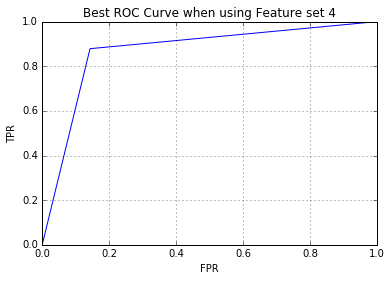

In [217]:

roc_curve =  graphlab.evaluation.roc_curve(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'])

plt.plot(roc_curve['fpr'], roc_curve['tpr'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Best ROC Curve when using Feature set 4')
plt.grid(True)
#plt.savefig("test.png")
plt.show()

## ROC Curve after Adding the job_tfidf feature to feature set 4 (['1gram features','2gram features','3gram features','city']).
## We see that the job_tfidf feature was really powerfull in boosting the fscore by double digits which increased the area under the ROC curve below.


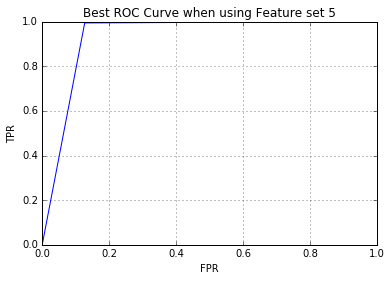

In [218]:

roc_curve =  graphlab.evaluation.roc_curve(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'])

plt.plot(roc_curve['fpr'], roc_curve['tpr'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Best ROC Curve when using Feature set 5')
plt.grid(True)
#plt.savefig("test.png")
plt.show()

## The following ROC curve shows the area under the ROC curve for the full feature set --> feature set 10
## featureset10 = ['1gram features','2gram features','3gram features','city','job_tfidf','location','company_name','AvgFTVector','job_title','D2Vector']

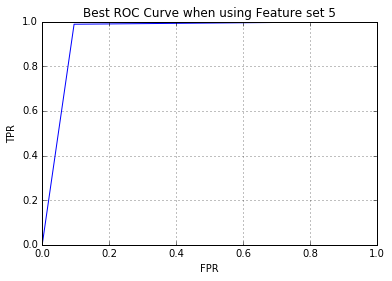

In [262]:

plt.plot(roc_curve['fpr'], roc_curve['tpr'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Best ROC Curve when using Feature set 5')
plt.grid(True)
#plt.savefig("test.png")
plt.show()

## The following ROC curve shows the drop in the area under the ROC curve when removing the Job title_tfidf feature from the full fetaure set --> Feature set 10 shown above.


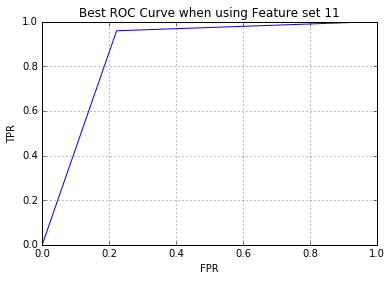

In [230]:

roc_curve =  graphlab.evaluation.roc_curve(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'])

plt.plot(roc_curve['fpr'], roc_curve['tpr'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Best ROC Curve when using Feature set 11')
plt.grid(True)
#plt.savefig("test.png")
plt.show()

## The followng ROC Curve shows the result of using feature set 12 that contains the full feature set (feature set 10) without the Doc2Vec feature

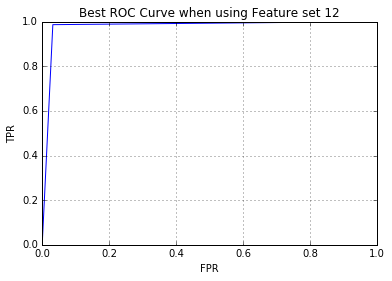

In [251]:

roc_curve =  graphlab.evaluation.roc_curve(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'])

plt.plot(roc_curve['fpr'], roc_curve['tpr'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Best ROC Curve when using Feature set 12')
plt.grid(True)
#plt.savefig("test.png")
plt.show()

## The followng ROC Curve id the result of using feature set 12 that contains the full feature set (feature set 10) without the average fast text vector feature. It is clear that removing the average fast text vector feature resulted in more drop in area under the ROC compared to removing the doc2vec vector feature.

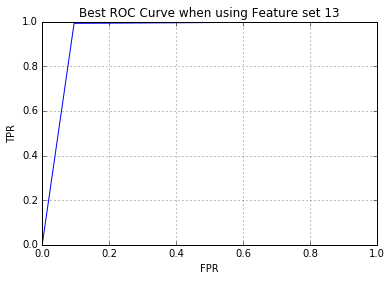

In [241]:


roc_curve =  graphlab.evaluation.roc_curve(indeed65k_90k_dssf_test['IndeedSalaryEstimate'], indeed65k_90k_dssf_test['predictions'])

plt.plot(roc_curve['fpr'], roc_curve['tpr'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Best ROC Curve when using Feature set 13')
plt.grid(True)
#plt.savefig("test.png")
plt.show()